# [方法介绍](https://www.bilibili.com/video/BV1AK411L77v?p=7)
    
#### 1.使用同样的随机数种子，使输入特征/标签一一对应
    np.random.seed(116)    
    np.random.shuffle(x_data)
    np.random.seed(116)
    np.random.shuffle(y_data)

#### 2.数据集分出永不相见的训练集和测试集
    x_train = x_data[:-30]
    y_train = y_data[:-30]
    x_test = x_data[-30:]
    y_test = y_data[-30:]


#### 3.配成【输入特征，标签】对，每次喂入一小撮(batch)、每32组打包成一个batch
    train_db = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)
    test_db = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)

#### 4.定义神经网络中所有可训练参数
    w1 = tf.Variable(tf.random.truncated_normal([4,3],stddev=0.1,seed=1))
    b1 = tf.Variable(tf.random.truncated_normal([3],stddev=0.1,seed=1)
> 因为输入特征是4个，所以是4.又只用一层网络，输出节点等于分类数等于3。w1就是4行3列的张量
b1必须要与w1的3一致

#### 5.计算准确率
    for epoch in range(epoch):# 数据集级别迭代        
        for step,(x_train,y_train) in enumerate(train_db):# batch级别迭代
            with tf.GradientTape() as tape: #记录梯度信息
                前向传播计算y
                计算总loss
             grads = tape.gradient(loss,[w1,b1]) #损失函数loss对w1,b1计算偏导数
             w1.assign_sub(lr*grads[0])#参数自更新
             b1.assign_sub(lr*grads[1])
        print("Epoch{},loss{}".format(epoch,loss_all/4))#打印出本轮的数值
> 训练集有120组数据,tatch是32个，每个step只能喂入32组数据，需要batch级别循环4次，除以4求得每次step迭代的平均值loss 120/32 = 3.75


    希望每个epoch循环后可以显示当前模型的效果，所以在每个epoch循环嵌套了一个batch级别的循环
    for x_test,y_test in test_db:
        y = tf.matmul(h,w) + b #前向传播计算出y为预测结果 matmul矩阵相乘
        y = tf.nn.softmax(y) # 使其y符合概率分布
        pred = tf.argmax(y,axis=1) #返回y中最大值的索引，即预测对的分类
        pred = tf.cast(pred,dtype=y_test.dtype)#  调整数据类型与标签一致
        correct = tf.cast(tf.equal(pred,y_test),dtype=tf.int32) #如果预测值与标签一致，correct子架1
        correct = tf.reduce_sum(correct) #把每个batch的correct数加起来
        total_correct += int (correct) #将所有batch中的correct数加起来
        total_num += x_test.shape[0]
     acc = total_correct / total_num
     print("test_acc:\n",acc)


####  6.可视化
         plt.title('Acc Curve')
         plt.xlabel('Epoch')
         plt.ylabel('Acc')
         plt.plot(test_acc,lable="$Accuracy$") #逐点画出test_acc并连线
         plt.legend()
         plt.show()


Epoch 0, loss: 0.2821310982108116
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.25459615513682365
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.22570249810814857
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.21028399839997292
Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.19942265003919601
Test_acc: 0.16666666666666666
--------------------------
Epoch 5, loss: 0.18873637914657593
Test_acc: 0.5
--------------------------
Epoch 6, loss: 0.17851299047470093
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.16922875493764877
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.16107673197984695
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.15404684841632843
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.14802725985646248
Test_acc: 0.5333333333333333
--------------------------
Epoch 11,

Epoch 92, loss: 0.07208118494600058
Test_acc: 0.7666666666666667
--------------------------
Epoch 93, loss: 0.07173734344542027
Test_acc: 0.8
--------------------------
Epoch 94, loss: 0.07139724027365446
Test_acc: 0.8
--------------------------
Epoch 95, loss: 0.07106082234531641
Test_acc: 0.8
--------------------------
Epoch 96, loss: 0.07072803378105164
Test_acc: 0.8
--------------------------
Epoch 97, loss: 0.0703988391906023
Test_acc: 0.8
--------------------------
Epoch 98, loss: 0.07007317896932364
Test_acc: 0.8333333333333334
--------------------------
Epoch 99, loss: 0.0697510140016675
Test_acc: 0.8666666666666667
--------------------------
Epoch 100, loss: 0.06943229213356972
Test_acc: 0.8666666666666667
--------------------------
Epoch 101, loss: 0.06911696959286928
Test_acc: 0.8666666666666667
--------------------------
Epoch 102, loss: 0.06880500447005033
Test_acc: 0.8666666666666667
--------------------------
Epoch 103, loss: 0.068496348336339
Test_acc: 0.866666666666666

Epoch 183, loss: 0.05156483128666878
Test_acc: 0.9666666666666667
--------------------------
Epoch 184, loss: 0.051422109827399254
Test_acc: 0.9666666666666667
--------------------------
Epoch 185, loss: 0.05128058139234781
Test_acc: 1.0
--------------------------
Epoch 186, loss: 0.05114021245390177
Test_acc: 1.0
--------------------------
Epoch 187, loss: 0.051001012325286865
Test_acc: 1.0
--------------------------
Epoch 188, loss: 0.05086293909698725
Test_acc: 1.0
--------------------------
Epoch 189, loss: 0.05072600580751896
Test_acc: 1.0
--------------------------
Epoch 190, loss: 0.050590199418365955
Test_acc: 1.0
--------------------------
Epoch 191, loss: 0.050455489195883274
Test_acc: 1.0
--------------------------
Epoch 192, loss: 0.05032187420874834
Test_acc: 1.0
--------------------------
Epoch 193, loss: 0.05018933489918709
Test_acc: 1.0
--------------------------
Epoch 194, loss: 0.050057861022651196
Test_acc: 1.0
--------------------------
Epoch 195, loss: 0.0499274553

Test_acc: 1.0
--------------------------
Epoch 296, loss: 0.04062717128545046
Test_acc: 1.0
--------------------------
Epoch 297, loss: 0.040562248788774014
Test_acc: 1.0
--------------------------
Epoch 298, loss: 0.040497696958482265
Test_acc: 1.0
--------------------------
Epoch 299, loss: 0.04043351951986551
Test_acc: 1.0
--------------------------
Epoch 300, loss: 0.04036971367895603
Test_acc: 1.0
--------------------------
Epoch 301, loss: 0.04030627105385065
Test_acc: 1.0
--------------------------
Epoch 302, loss: 0.040243194438517094
Test_acc: 1.0
--------------------------
Epoch 303, loss: 0.04018046800047159
Test_acc: 1.0
--------------------------
Epoch 304, loss: 0.04011810338124633
Test_acc: 1.0
--------------------------
Epoch 305, loss: 0.04005609406158328
Test_acc: 1.0
--------------------------
Epoch 306, loss: 0.039994440507143736
Test_acc: 1.0
--------------------------
Epoch 307, loss: 0.03993312222883105
Test_acc: 1.0
--------------------------
Epoch 308, loss: 0.

Test_acc: 1.0
--------------------------
Epoch 410, loss: 0.03504961961880326
Test_acc: 1.0
--------------------------
Epoch 411, loss: 0.03501288779079914
Test_acc: 1.0
--------------------------
Epoch 412, loss: 0.03497632360085845
Test_acc: 1.0
--------------------------
Epoch 413, loss: 0.03493990935385227
Test_acc: 1.0
--------------------------
Epoch 414, loss: 0.03490366041660309
Test_acc: 1.0
--------------------------
Epoch 415, loss: 0.03486755723133683
Test_acc: 1.0
--------------------------
Epoch 416, loss: 0.034831615164875984
Test_acc: 1.0
--------------------------
Epoch 417, loss: 0.03479582304134965
Test_acc: 1.0
--------------------------
Epoch 418, loss: 0.03476017666980624
Test_acc: 1.0
--------------------------
Epoch 419, loss: 0.034724689088761806
Test_acc: 1.0
--------------------------
Epoch 420, loss: 0.03468935191631317
Test_acc: 1.0
--------------------------
Epoch 421, loss: 0.03465416422113776
Test_acc: 1.0
--------------------------
Epoch 422, loss: 0.03

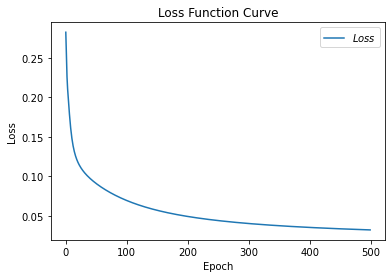

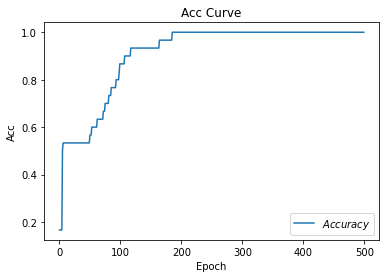

In [1]:
# -*- coding: UTF-8 -*-
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

# 训练部分
for epoch in range(epoch):  #数据集级别的循环，每个epoch循环一次数据集
     # enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标
    for step, (x_train, y_train) in enumerate(train_db):  #batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
        w1.assign_sub(lr * grads[0])  # 参数w1自更新
        b1.assign_sub(lr * grads[1])  # 参数b自更新

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all/4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()
